In [91]:
import torch 
import pandas as pd 
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from torchvision import transforms as T
from torchvision.transforms.functional import to_tensor
from torchvision.utils import make_grid
import numpy as np
import random

In [9]:
root = "./UW_madison_dataset/"

In [39]:
def rle2mask(image_size, segments):
    mask = torch.zeros(3, image_size[0] * image_size[1], dtype=torch.float32)
    for idx, segment in enumerate(segments):
        if str(segment) != 'nan':
            segment = segment.split(' ')
            starts = np.array(segment[::2], dtype=np.int32)  - 1
            lengths = np.array(segment[1::2], dtype=np.int32) 
            ends = starts + lengths
            for s, e in zip(starts, ends):
                mask[idx, s:e] = 1

    return mask.reshape((3, image_size[0], image_size[1]))

In [28]:
image_trasform = T.Compose([T.Resize((224, 224)),
                            T.ToTensor(),
                            T.Lambda(lambda x : (x - x.min()) / (x.max() - x.min())),
                            T.Lambda(lambda x : x.repeat(3, 1, 1))])

mask_trasform = T.Compose([T.Resize((224, 224))])

Show image ans Mask


Red ->> large_bowel -- Green ->> small_bowel -- Blue ->> stomach


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


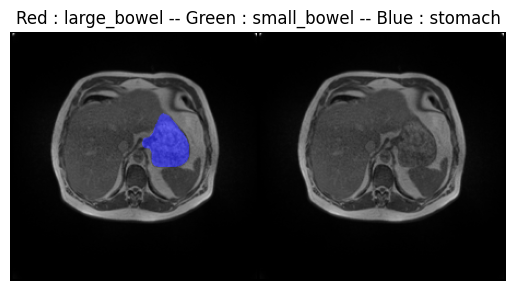

In [120]:
train_df = pd.read_csv(root + 'train.csv')

index = random.randint(0, train_df.shape[0]) 

sample = train_df.iloc[index]

image = image_trasform(Image.open(sample['Address']))
mask = mask_trasform(rle2mask([sample['height'], sample['weidth']], [sample['large_bowel'], sample['small_bowel'], sample['stomach']]))

print('\nRed ->> large_bowel -- Green ->> small_bowel -- Blue ->> stomach')

plt.title('Red : large_bowel -- Green : small_bowel -- Blue : stomach')
grid_image = make_grid([image + mask * 0.55, image], nrow=2)
plt.imshow(grid_image.permute(1,2,0))
plt.axis('off');

In [47]:
mask.shape, to_tensor(Image.open(sample['Address'])).shape

(torch.Size([3, 360, 310]), torch.Size([1, 310, 360]))

In [34]:
sample

id                                      case141_day13_slice_0107
large_bowel    29923 6 30188 8 30453 10 30719 10 30984 12 312...
small_bowel    29943 16 30199 29 30465 31 30731 44 30943 6 30...
stomach                                                      NaN
Address        ./UW_madison_dataset/train/case141/case141_day...
case                                                         141
day                                                           13
slice                                                        107
weidth                                                       266
height                                                       266
counts                                                         2
Name: 7790, dtype: object